In [5]:
from gambler_ruin import Simulation as gambler_ruin_simulation

Two players, Angelo and Leonardo, repeatedly toss an (unfair) coin.  
Angelo starts with 2 dollars, Leonardo with 1 dollar. 
For heads, Angelo wins one dollar from Leonardo, for tails, Leonardo wins one dollar from Angelo.
The game continues until one player is bankrupt.

Here, we simulate the game.


The estimate of the probability of Angelo winning (with its confidence interval) is: 

In [2]:
p = 2/3
sim = gambler_ruin_simulation(p)

"""
Define here the statistical parameters
"""
CONFIDENCE = 0.95
SAMPLES = 10000

results = sim.get_confidence_interval(CONFIDENCE, SAMPLES)

The sample proportion is:  0.568
The  95.0 % confidence interval for the mean of the population is: [ 0.5582912318001373 0.5777087681998626 ]


Next, we analyze for several values of p what happens, as we know, from the analytical study done in the .pdf file that $p = \frac{1}{2}$ is the critical value for which Angelo starts losing almost surely. 

The sample proportion is:  0.014
The  95.0 % confidence interval for the mean of the population is: [ 0.011697229981937804 0.0163027700180622 ]
The sample proportion is:  0.074
The  95.0 % confidence interval for the mean of the population is: [ 0.06886938479099003 0.07913061520900996 ]
The sample proportion is:  0.3382
The  95.0 % confidence interval for the mean of the population is: [ 0.3289274694243887 0.3474725305756113 ]
The sample proportion is:  0.5709
The  95.0 % confidence interval for the mean of the population is: [ 0.5611992040452389 0.580600795954761 ]
The sample proportion is:  0.6949
The  95.0 % confidence interval for the mean of the population is: [ 0.6858753503558528 0.7039246496441471 ]
The sample proportion is:  0.7642
The  95.0 % confidence interval for the mean of the population is: [ 0.755879996517449 0.772520003482551 ]
The sample proportion is:  0.8083
The  95.0 % confidence interval for the mean of the population is: [ 0.8005848311211883 0.8160151688788118 ]


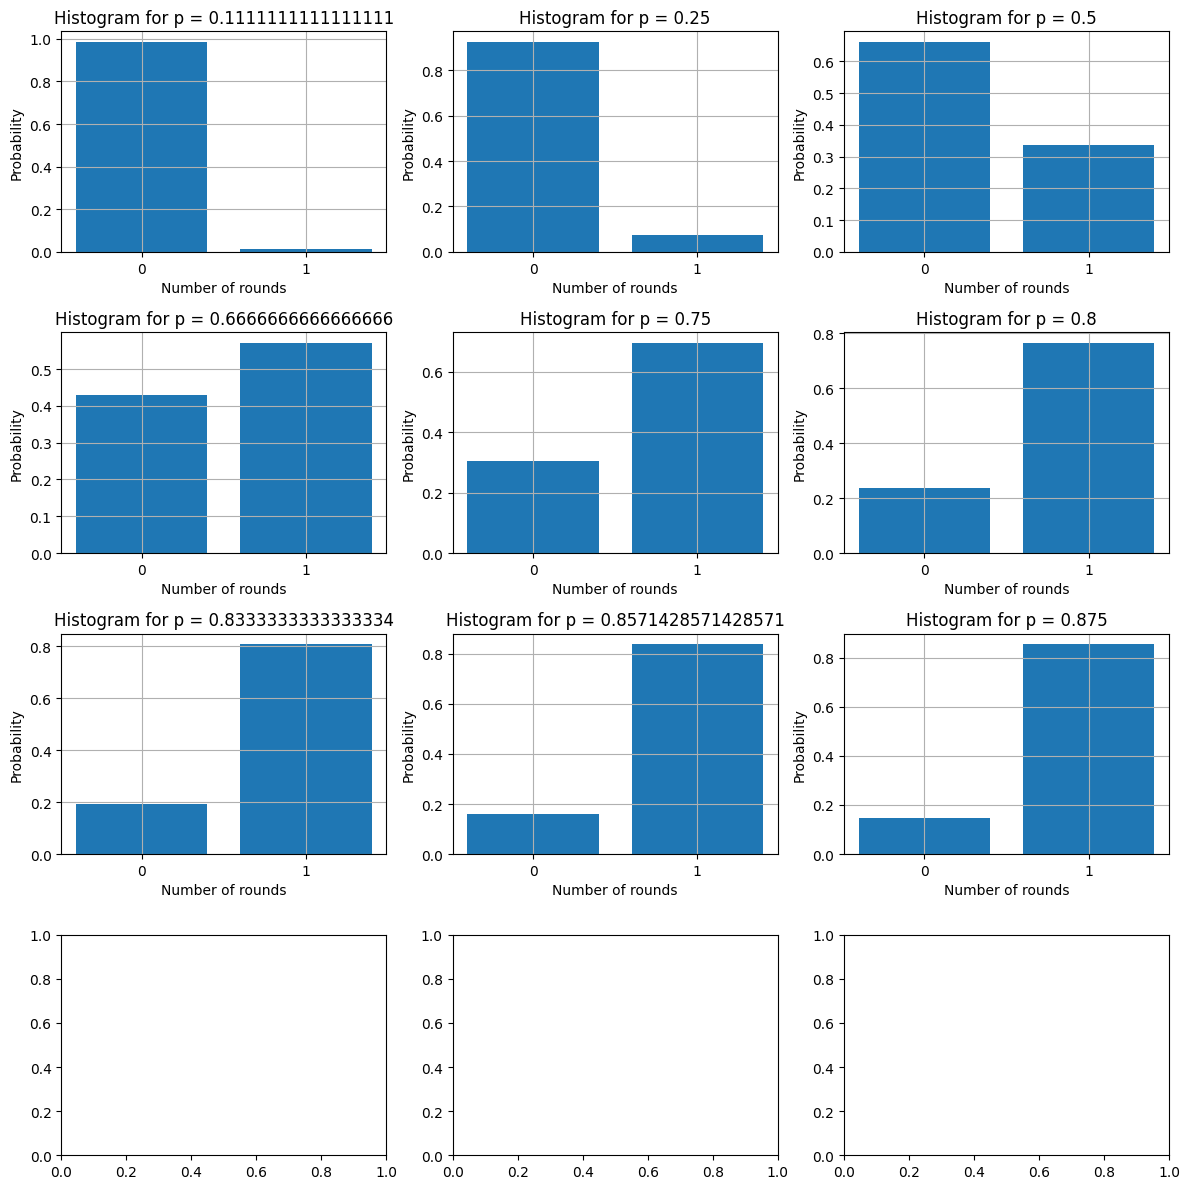

In [14]:
import matplotlib.pyplot as plt
probs = [1/9, 1/4, 1/2, 2/3, 3/4, 4/5, 5/6, 6/7, 7/8]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i, p in enumerate(probs):
    sim_p = gambler_ruin_simulation(p)
    observations_p = sim_p.get_confidence_interval(CONFIDENCE, SAMPLES)
    row = i // 3
    col = i % 3
    labels = ['0', '1']
    ones = sum(observations_p)
    counts = [(SAMPLES - ones) / SAMPLES, ones / SAMPLES]
    axes[row, col].bar(labels, counts)
    axes[row, col].set_xlabel('Outcome of Bernoulli random variable')
    axes[row, col].set_ylabel('Probability')
    axes[row, col].set_title(f'Plot for p = {p}')
    axes[row, col].set_ylim([0, 1])
plt.tight_layout()
plt.show()


Now, we analyze a more general case, when Angelo and Leonardo start with an arbitrary amount of money, respectively "angelo_start" and "leonardo_start".

In [1]:
from gambler_ruin import Generalized_Simulation as general_simulation

We see that this case includes the simpler one we studied above. 
Indeed, this is just a general random walk problem with two absorbing barriers. 
In the previous we had a finite number of states between these two barriers (i.e. states "0" and "1"), now this number depends on the values of "angelo_start" and "leonardo_start".

In [4]:
p = 1/2
angelo_start = 1
leonardo_start = 2
sim = general_simulation(p, angelo_start, leonardo_start)

"""
Define here the statistical parameters
"""
CONFIDENCE = 0.95
SAMPLES = 10000

results = sim.get_confidence_interval(CONFIDENCE, SAMPLES)

The sample proportion is:  0.339
The  95.0 % confidence interval for the mean of the population is: [ 0.329722121734565 0.34827787826543505 ]
